In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf




from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost

#core import for hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
google_data=pd.read_csv(r'file:///E:\Abhi%20disseratation\googleplaystore.csv')
google_data.head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
google_data_copy=google_data.copy()

In [4]:
google_data_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
google_data_copy.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
google_data_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
google_data_copy.dropna(inplace=True)

In [8]:
google_data_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
google_data_copy.shape

(9360, 13)

In [10]:
google_data_copy.dropna(inplace=True)

In [11]:
google_data_copy.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
google_data_copy.shape

(9360, 13)

In [13]:
google_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content_Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [14]:
#Extract the numeric value from the column
def convert_size(size):
    if len(size)<6:
        size_str, memory = size[:-1], size[-1]
        val= float(size_str)
        if memory == 'M':
            numeric_value = val*1000
            return int(round(numeric_value))
        elif memory == 'K':
            numeric_value = val
            return int(round(numeric_value))
    else:
        return None

google_data_copy['Size'] = google_data_copy['Size'].apply(convert_size)
google_data_copy.dropna(axis=0, inplace = True)


In [15]:
google_data_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300.0,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up


In [16]:
# Treat 1,000,000+ as 1,000,000 and remove the "+" symbol
google_data_copy['Installs'] = google_data_copy['Installs'].str.replace('+', '')
google_data_copy['Installs'] = google_data_copy['Installs'].str.replace(',', '')

# Convert the Installs field to integer
google_data_copy['Installs'] = google_data_copy['Installs'].astype(float)

In [17]:
google_data_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [18]:
# Remove the '$' symbol from the Price column
google_data_copy['Price'] = google_data_copy['Price'].str.replace('$', '')

# Convert the Price field to numeric
google_data_copy['Price'] = pd.to_numeric(google_data_copy['Price'], errors='coerce')

In [19]:
google_data_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [20]:
# Convert relevant columns to appropriate data types
google_data_copy['Rating'] = pd.to_numeric(google_data_copy['Rating'], errors='coerce')
google_data_copy['Reviews'] = pd.to_numeric(google_data_copy['Reviews'], errors='coerce')
google_data_copy['Installs'] = pd.to_numeric(google_data_copy['Installs'], errors='coerce')
google_data_copy['Price'] = pd.to_numeric(google_data_copy['Price'], errors='coerce')



In [21]:
google_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7466 non-null   object 
 1   Category        7466 non-null   object 
 2   Rating          7466 non-null   float64
 3   Reviews         7466 non-null   int64  
 4   Size            7466 non-null   float64
 5   Installs        7466 non-null   float64
 6   Type            7466 non-null   object 
 7   Price           7466 non-null   float64
 8   Content_Rating  7466 non-null   object 
 9   Genres          7466 non-null   object 
 10  Last Updated    7466 non-null   object 
 11  Current Ver     7466 non-null   object 
 12  Android Ver     7466 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 816.6+ KB


In [22]:
# Drop rows with average rating outside the range of 1 to 5
google_data_copy = google_data_copy[(google_data_copy['Rating'] >= 1) & (google_data_copy['Rating'] <= 5)]

# Drop rows where reviews are greater than installs
google_data_copy = google_data_copy[google_data_copy['Reviews'] <= google_data_copy['Installs']]

# Drop rows where price is greater than 0 for free apps
google_data_copy = google_data_copy[(google_data_copy['Type'] != 'Free') | (google_data_copy['Price'] <= 0)]

In [23]:
google_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7460 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7460 non-null   object 
 1   Category        7460 non-null   object 
 2   Rating          7460 non-null   float64
 3   Reviews         7460 non-null   int64  
 4   Size            7460 non-null   float64
 5   Installs        7460 non-null   float64
 6   Type            7460 non-null   object 
 7   Price           7460 non-null   float64
 8   Content_Rating  7460 non-null   object 
 9   Genres          7460 non-null   object 
 10  Last Updated    7460 non-null   object 
 11  Current Ver     7460 non-null   object 
 12  Android Ver     7460 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 815.9+ KB


In [24]:
google_data_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
google_data_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 5. , 2.6, 3.1, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [26]:
google_data_copy.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [27]:
google_data_copy.shape

(7460, 13)

# Univariate Analysis

In [28]:
##Performing univariate analysis

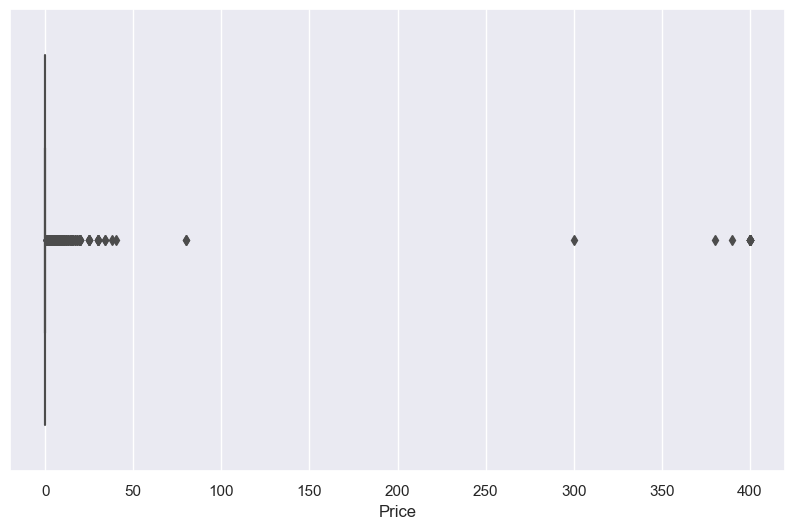

In [29]:
# Box Plot for Price
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x= 'Price',data= google_data_copy);

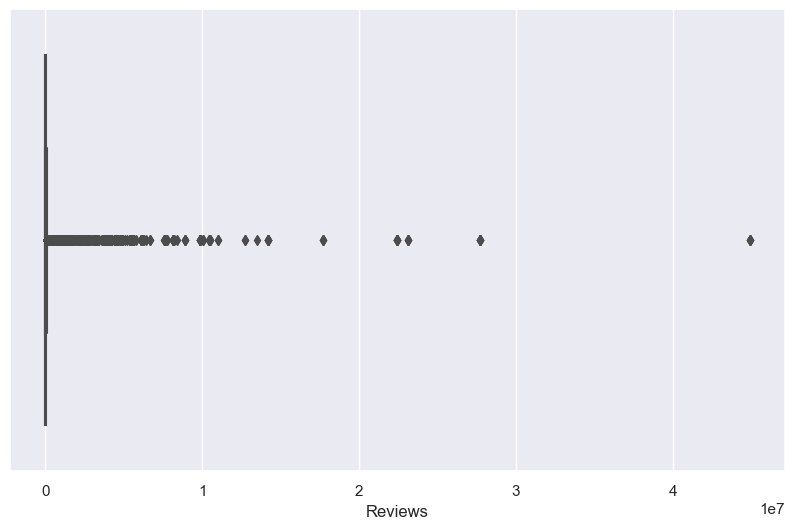

In [30]:
# Boxplot for Reviews
sns.boxplot(x ='Reviews', data =google_data_copy);

(array([  17.,   18.,   38.,   68.,  126.,  386.,  736., 1334., 3130.,
        1607.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

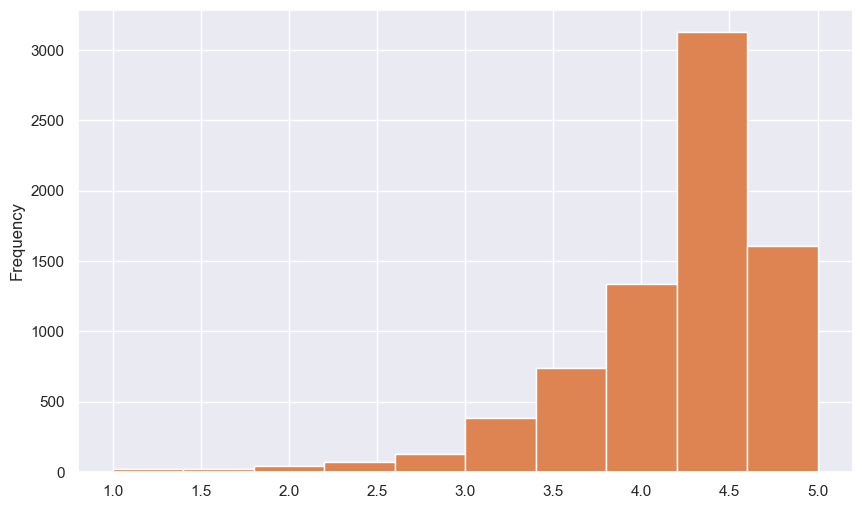

In [31]:
# Histogram for Rating
google_data_copy['Rating'].plot(kind= 'hist'); #we can use either to get the results
plt.hist(google_data_copy['Rating'])

(array([2988., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([  1000.,  10900.,  20800.,  30700.,  40600.,  50500.,  60400.,
         70300.,  80200.,  90100., 100000.]),
 <BarContainer object of 10 artists>)

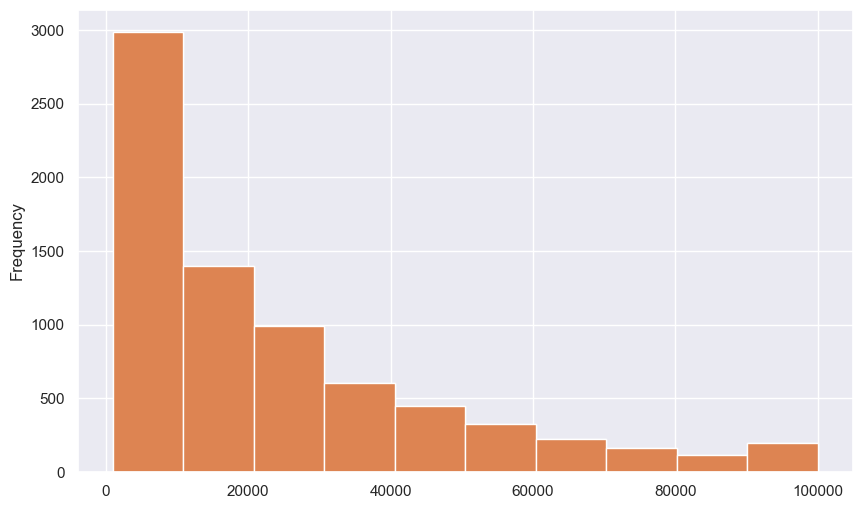

In [32]:
# Histogram for Size
google_data_copy['Size'].plot(kind= 'hist') #we can use either to get the results
plt.hist(google_data_copy['Size'])

# Bivariate analysis

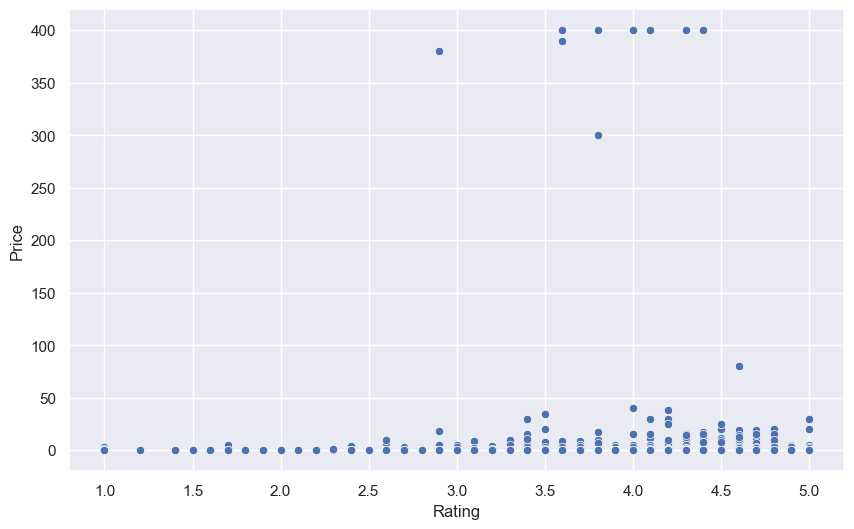

In [33]:
# Scatterplot for Rating Vs price
sns.scatterplot(x='Rating', y='Price', data=google_data_copy)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

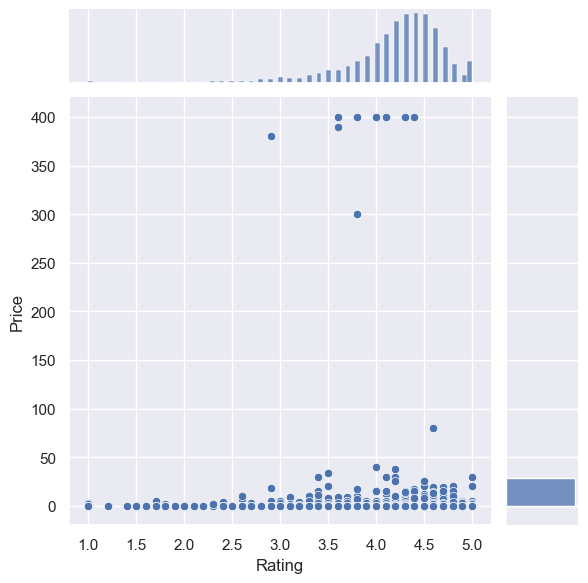

In [34]:
#  joinplot for Rating Vs price
sns.jointplot(x='Rating', y='Price', data=google_data_copy)


plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Size'>

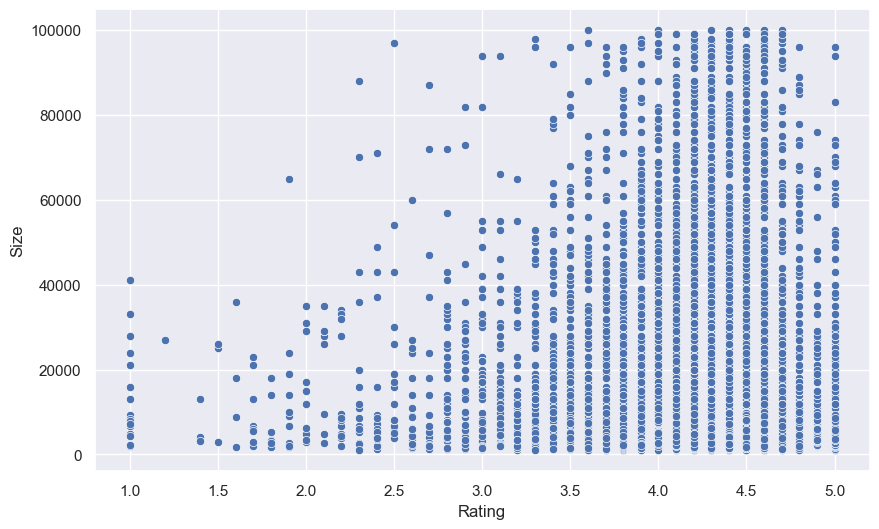

In [35]:
#2) Scatterplot for Rating Vs. Size
sns.scatterplot(x= 'Rating',y= 'Size', data=google_data_copy )

Sizing Strategy: How does the size of the app affect the ratings and number of installs?

Text(0.5, 1.02, 'Rating vs Size of Apps')

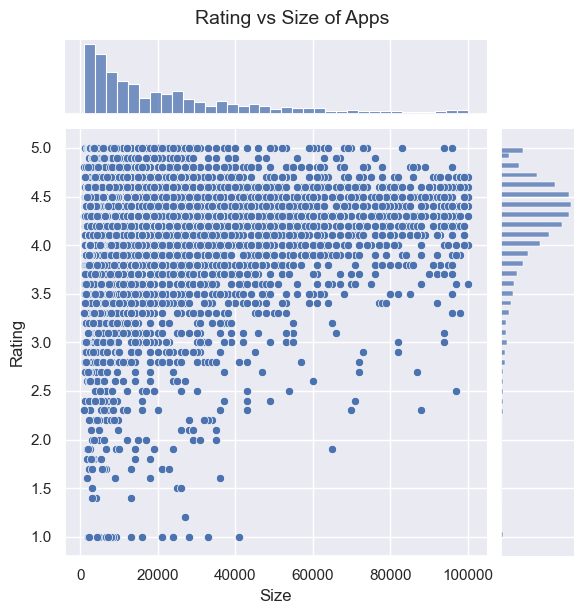

In [36]:
sns.set_style("darkgrid")
ax = sns.jointplot(google_data_copy['Size'], google_data_copy['Rating'])
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

In [37]:
## Sizing distribution of top rated apps (>= 4.5) 
google_data_copy_top_rated = google_data_copy[google_data_copy["Rating"]>=4.5]
sizing_distribution = [go.Histogram(x = google_data_copy_top_rated.Size,)]
print('Average size of top rated apps = ', np.mean(google_data_copy_top_rated['Size']))
#plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')
layout =dict(title = 'Average Size of top rated apps',
             xaxis = dict(title = 'Size of Apps'),
             yaxis = dict(title = 'Distribution'),
             )
sizing_distribution = dict(data = sizing_distribution, layout = layout)
plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')

Average size of top rated apps =  24275.07270461155


Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too bulky.

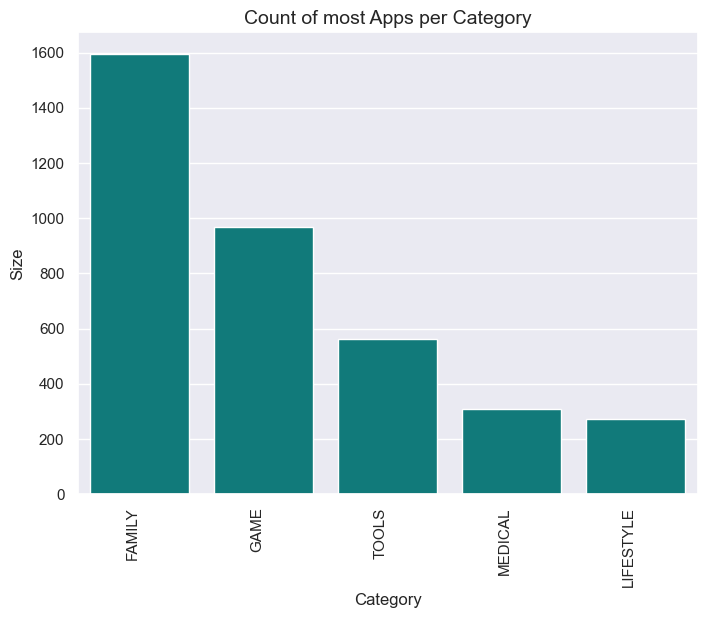

In [38]:
#Which categories have the most apps and how are they rated?

most_apps = google_data_copy[google_data_copy["Size"]>40]
most_category = most_apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=most_category, color = "darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of most Apps per Category',size = 14)
plt.savefig("Count_most")

In [39]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(google_data_copy.Category))))]

subset_google_data_copy = google_data_copy[google_data_copy.Size > 40]
groups_temp = subset_google_data_copy.groupby('Category').filter(lambda x: len(x) >20)

data = [{
    'x': groups_temp.loc[subset_google_data_copy.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_google_data_copy['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    } for category in enumerate(['GAME', 'FAMILY'])]

layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})


The majority of huge applications (>50MB) fall within the game and family category. Despite this, these expensive apps have generally positive ratings, suggesting that they are expensive on purpose.



In [40]:
#How do the sizes of paid apps and free apps vary?
    
    
paid_apps = google_data_copy[google_data_copy.Type == 'Paid']

data = [{
    'x' : paid_apps['Rating'],
    'type':'scatter',
    'y' : paid_apps['Size'],
    'mode' : 'markers',
    'text' : google_data_copy['Size'],
    } for t in set(paid_apps.Type)]


layout = {'title':"Rating vs Size for Paid Apps", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(255,255,255)'}

plotly.offline.iplot({'data': data, 'layout': layout})

The majority of highly rated paid apps are very small in size. This indicates that the majority of premium apps are created and built to meet certain functional requirements and are therefore not bulky. Users prefer to pay for lightweight applications. Large premium apps may not perform well in the market.


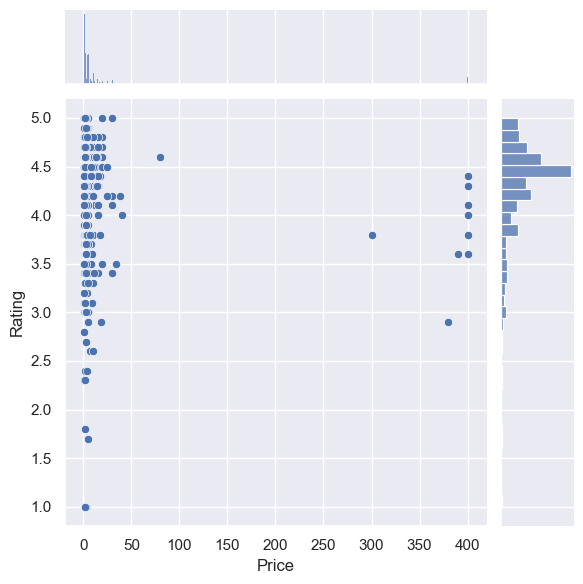

In [41]:
# How do App prices affect rating and number of installs?
paid_apps = google_data_copy[google_data_copy.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

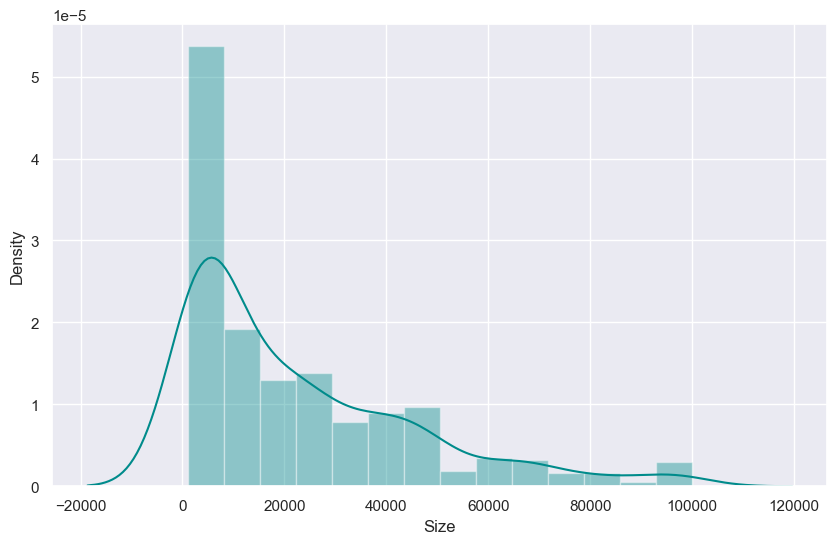

In [42]:
paid_apps_size = paid_apps['Size'].dropna()
ax = sns.distplot(paid_apps_size, color="darkcyan")

There are very few apps priced above $20, which is where the majority of highly rated apps fall inside their ideal price range.


Text(0.5, 1.0, 'App pricing trend across categories')

<Figure size 1200x600 with 0 Axes>

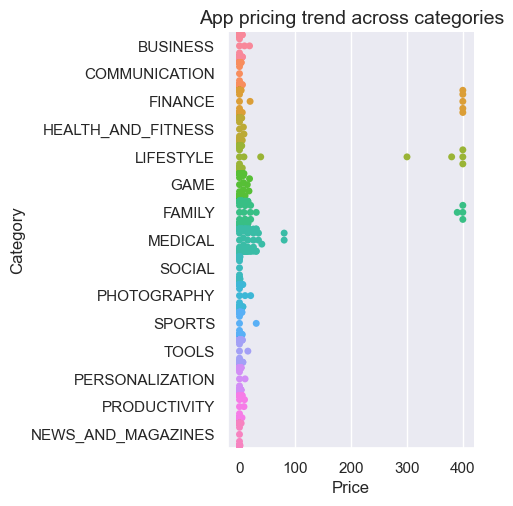

In [43]:
categories_top = google_data_copy[google_data_copy.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS','PRODUCTIVITY','PERSONALIZATION','SPORTS','COMMUNICATION',
                                                        'HEALTH_AND_FITNESS','NEWS_AND_MAGAZINES','SOCIAL'])]

plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.catplot(x="Price", y="Category", kind="swarm", data=categories_top)
plt.title('App pricing trend across categories',size = 14)

Rating Distribution

In [44]:
## general distribution of rating
distributionofrating = [go.Histogram(
        x = google_data_copy.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(google_data_copy['Rating']))
plotly.offline.iplot(distributionofrating, filename='overall_rating_distribution')

Average app rating =  4.179182305630031


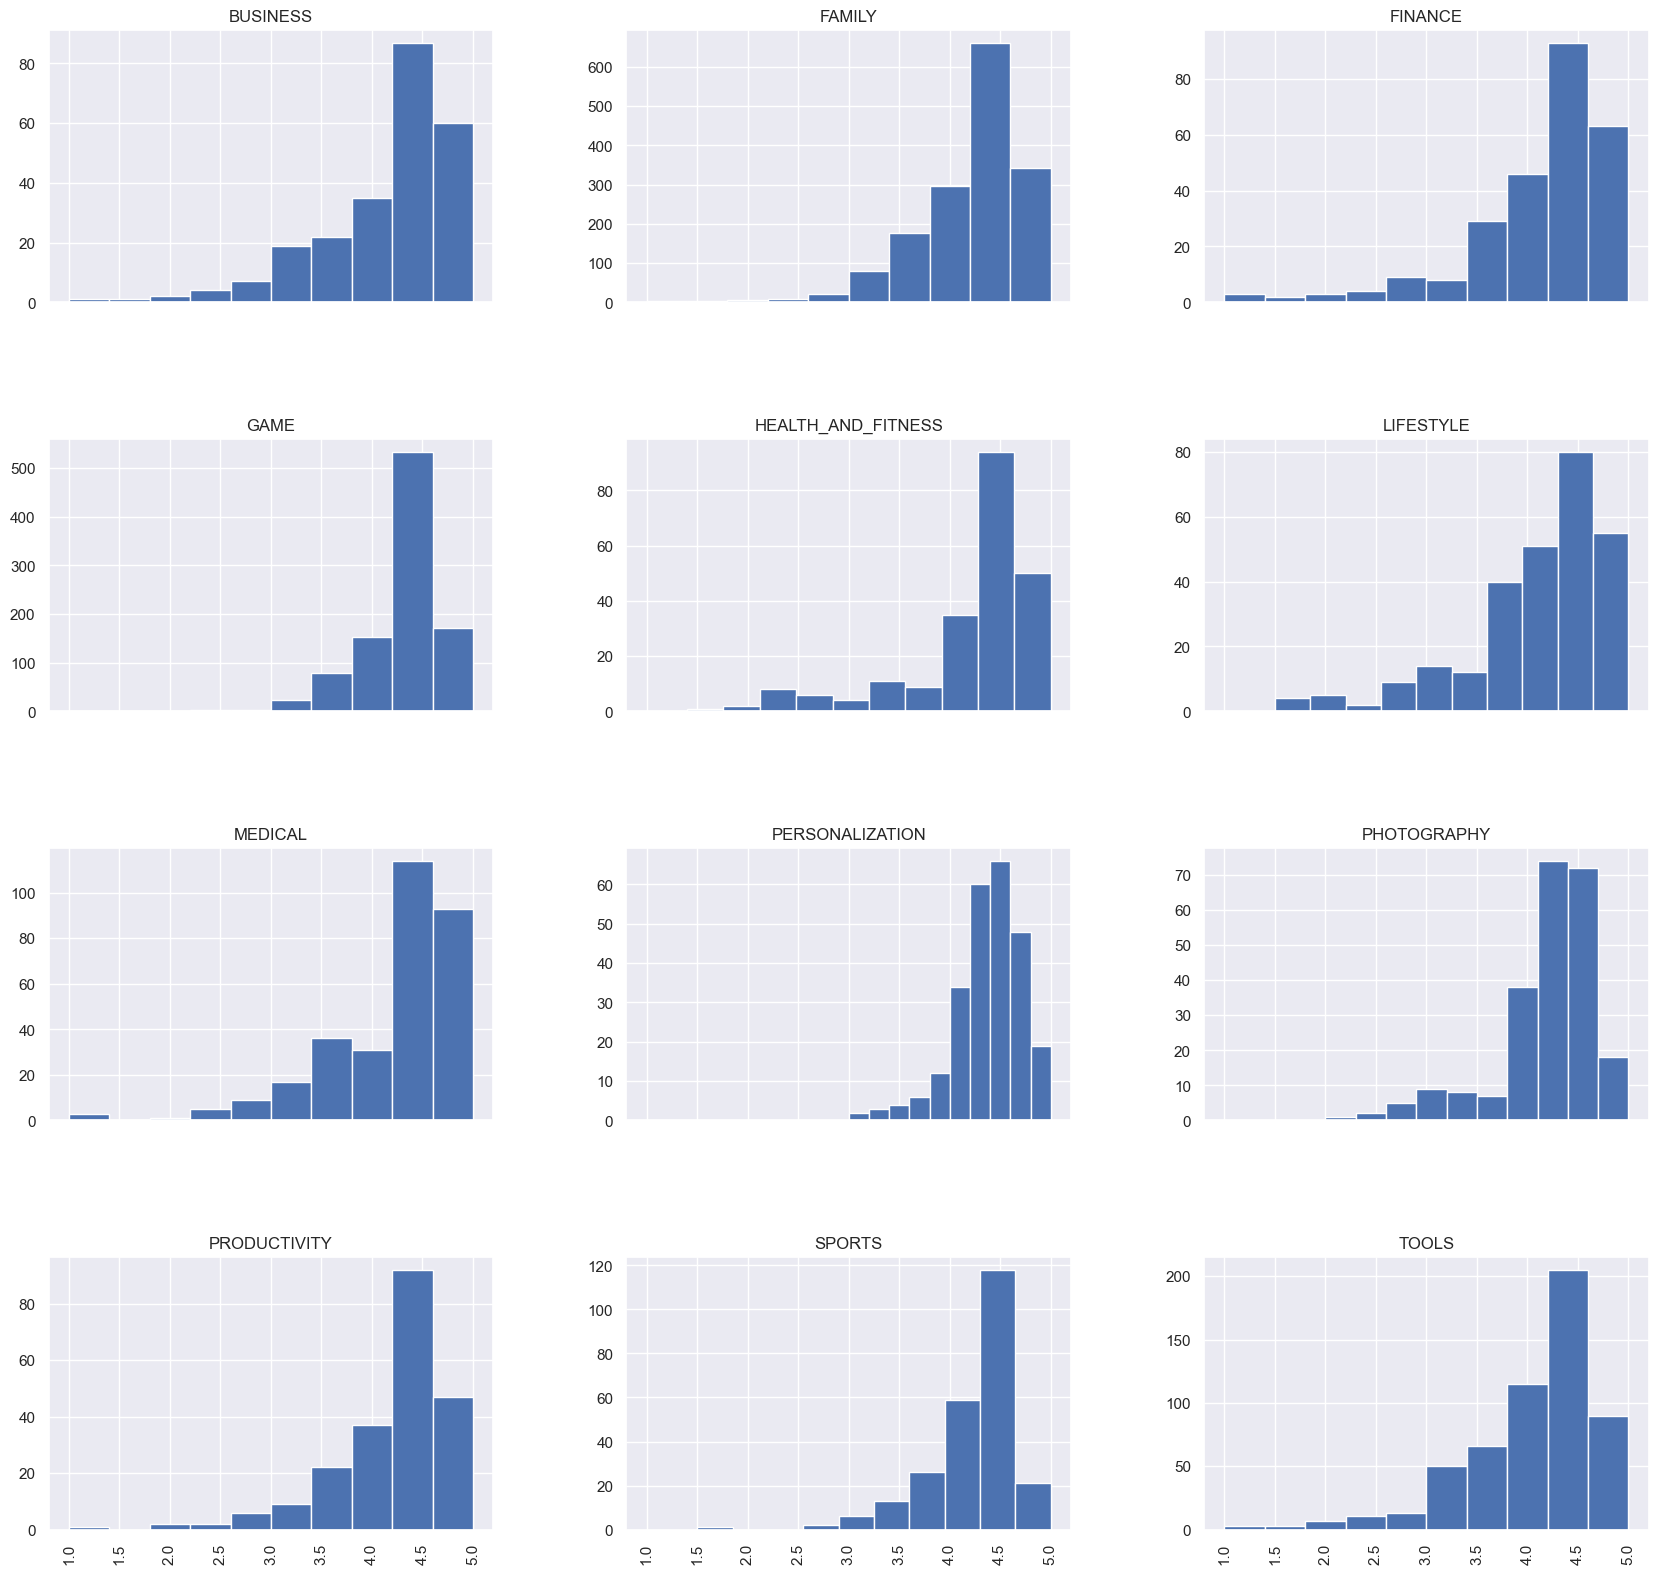

In [45]:
# plots for apps category vs rating
highly_categories = google_data_copy.groupby("Category").filter(lambda x: len(x) > 200).reset_index()
array = highly_categories['Rating'].hist(by=highly_categories['Category'], sharex=True, figsize=(20,20))

[Text(0, 0, 'BUSINESS'),
 Text(1, 0, 'COMMUNICATION'),
 Text(2, 0, 'DATING'),
 Text(3, 0, 'FINANCE'),
 Text(4, 0, 'HEALTH_AND_FITNESS'),
 Text(5, 0, 'LIFESTYLE'),
 Text(6, 0, 'GAME'),
 Text(7, 0, 'FAMILY'),
 Text(8, 0, 'MEDICAL'),
 Text(9, 0, 'SOCIAL'),
 Text(10, 0, 'SHOPPING'),
 Text(11, 0, 'PHOTOGRAPHY'),
 Text(12, 0, 'SPORTS'),
 Text(13, 0, 'TOOLS'),
 Text(14, 0, 'PERSONALIZATION'),
 Text(15, 0, 'PRODUCTIVITY')]

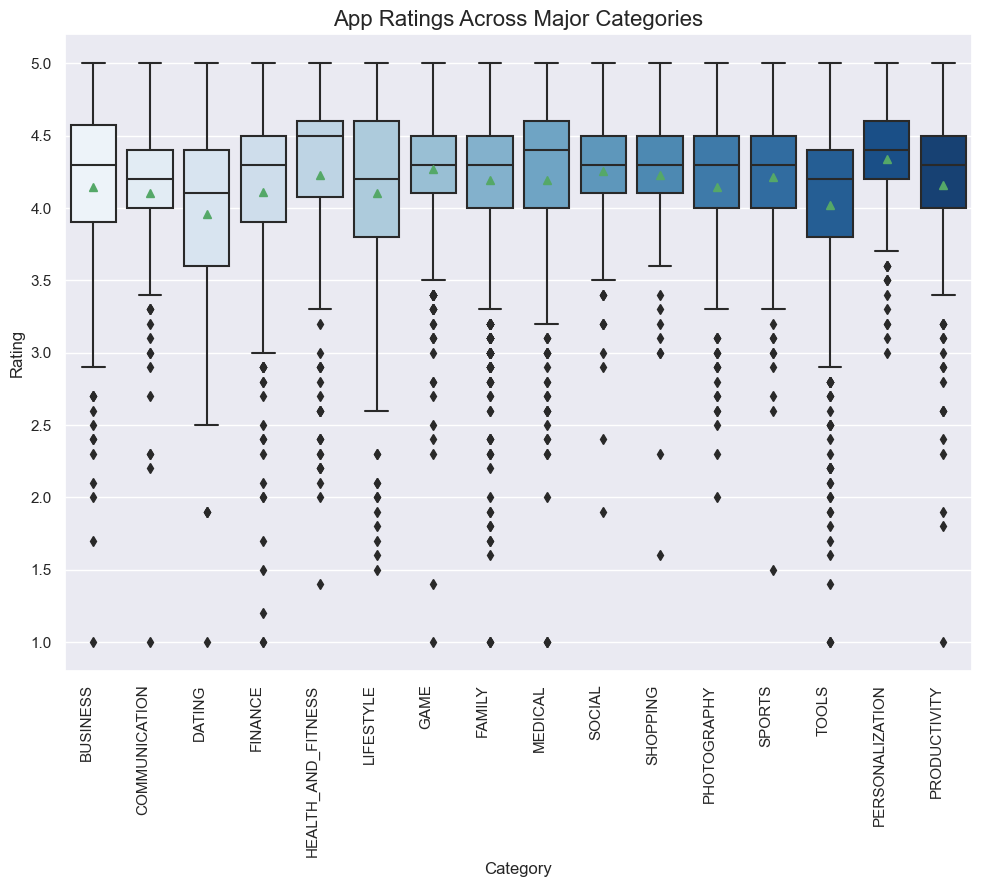

In [46]:
#box pot using App Ratings Across Major Categories
highlycat = google_data_copy.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("App Ratings Across Major Categories", fontsize=16)
ax = sns.boxplot(x='Category', y='Rating', data=highlycat, palette='Blues', showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

#dating is the most spreadout,and the mean value of dating rating is highest,followed by presonalization and the medical has the lowest mean value

# outliers

In [47]:
#I) price of $200 and above for an application is expected to be very high
google_data_copy[google_data_copy['Price']>200].index.shape[0] #we can use either to get the results
google_data_copy.loc[google_data_copy['Price']>200].shape[0]

14

In [48]:
#Dropping the Junk apps
google_data_copy.drop(google_data_copy[google_data_copy['Price']>200].index, inplace= True)

In [49]:
google_data_copy.shape

(7446, 13)

In [50]:
#II) Very few apps have very high no. of Reviews
google_data_copy.loc[google_data_copy['Reviews']>2000000].shape[0]

219

In [51]:
#Dropping the Star apps as these will skew the analysis,
#checking the shape after dropping
google_data_copy.drop(google_data_copy[google_data_copy['Reviews']>2000000].index, inplace= True)
google_data_copy.shape

(7227, 13)

In [52]:
#dropping the value more than the cutoff(threshold -95th percentile)
google_data_copy.drop(google_data_copy[google_data_copy['Installs']>10000000].index, inplace= True)

In [53]:
google_data_copy.shape

(7051, 13)

In [54]:
#2) Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model
google_data_copy.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1, inplace = True)

In [55]:
google_data_copy.head(5)

,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000.0,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5600.0,50000.0,0.0,Everyone,Art & Design


# Data Pre-processing

In [56]:
google_data_copy.head()

,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000.0,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5600.0,50000.0,0.0,Everyone,Art & Design


In [57]:
#get unique values in column category
google_data_copy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [58]:
google_data_copy.Category = pd.Categorical(google_data_copy.Category)

x = google_data_copy[['Category']]
del google_data_copy['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
google_data_copy = pd.concat([google_data_copy,dummies], axis=1)
google_data_copy.head()

,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000.0,10000.0,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000.0,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000.0,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,5600.0,50000.0,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#get unique values in Column Genres
google_data_copy["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain 

In [60]:
#Create an empty list
lists = []
#Get the total genres count and gernes count of perticular gerner count less than 20 append those into the list
for i in google_data_copy.Genres.value_counts().index:
    if google_data_copy.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the gerners which are in the list to other
google_data_copy.Genres = ['Other' if i in lists else i for i in google_data_copy.Genres]

In [61]:
google_data_copy["Genres"].unique()


array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Trivia',
       'Educational;Education', 'Casual;Pretend Play', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Adventure', 'Educational', 'Casino'], dtype=object)

In [62]:
#Storing the genres column into x varible and delete the genres col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
google_data_copy.Genres = pd.Categorical(google_data_copy['Genres'])
x = google_data_copy[["Genres"]]
del google_data_copy['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
google_data_copy = pd.concat([google_data_copy,dummies], axis=1)

In [63]:
google_data_copy.head()

,Rating,Reviews,Size,Installs,Price,Content_Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,159,19000.0,10000.0,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000.0,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000.0,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000.0,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,5600.0,50000.0,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
google_data_copy["Content_Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [65]:
#Applying one hot encoding 
#Storing the Content Rating column into x varible and delete the Content Rating col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
google_data_copy['Content_Rating'] = pd.Categorical(google_data_copy['Content_Rating'])

x = google_data_copy[['Content_Rating']]
del google_data_copy['Content_Rating']

dummies = pd.get_dummies(x, prefix = 'Content_Rating')
google_data_copy = pd.concat([google_data_copy,dummies], axis=1)
google_data_copy.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,159,19000.0,10000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700.0,5000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967,2800.0,100000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,167,5600.0,50000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
google_data_copy.shape

(7051, 95)

# Model building

In [67]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [68]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature 
google_data_copy2 = google_data_copy
X = google_data_copy2.drop('Rating',axis=1)
y = google_data_copy2['Rating']

#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [69]:
#Create a linear reggression obj by calling the linear reggressor algorithm
lin_reggressor = LinearRegression()
lin_reggressor.fit(X_train,y_train)

LinearRegression()

In [70]:
lin_reggressor.coef_

array([ 4.61259697e-07,  3.98856127e-07,  5.69636325e-09,  4.65456656e-03,
        1.58493470e-01, -2.16212508e-02,  1.07047345e-01,  8.86616678e-02,
       -3.56249958e-02,  5.85112421e-01, -5.77781511e-02, -1.01237903e-01,
        5.88683426e-02, -3.34118403e-02,  1.67910344e-01, -1.06861590e-02,
       -3.50105305e-02, -3.12424925e-02,  8.82773829e-02,  4.24438528e-02,
       -1.34490549e-02,  7.29262114e-02, -3.71463031e-01, -4.47595300e-02,
        2.19490758e-02,  3.95493837e-03, -2.25352806e-01,  8.86813546e-02,
       -4.35180532e-02, -2.73354973e-02,  3.36483957e-02,  2.00419970e-02,
       -1.21638516e-01, -8.13194952e-02, -1.13589941e-01, -2.20861179e-01,
        5.18836281e-02, -1.15732230e-01, -1.24648927e-01, -6.82711966e-02,
        6.55044871e-02, -2.16212508e-02,  1.07047345e-01,  7.89974760e-03,
        8.86616678e-02, -3.56249958e-02, -2.48288782e-01,  4.92874934e-02,
       -1.51906906e-01,  3.15693879e-02, -6.74639262e-01, -5.77781511e-02,
       -1.01237903e-01,  

In [71]:
predictions = lin_reggressor.predict(X_test)

Text(0, 0.5, 'predicted values')

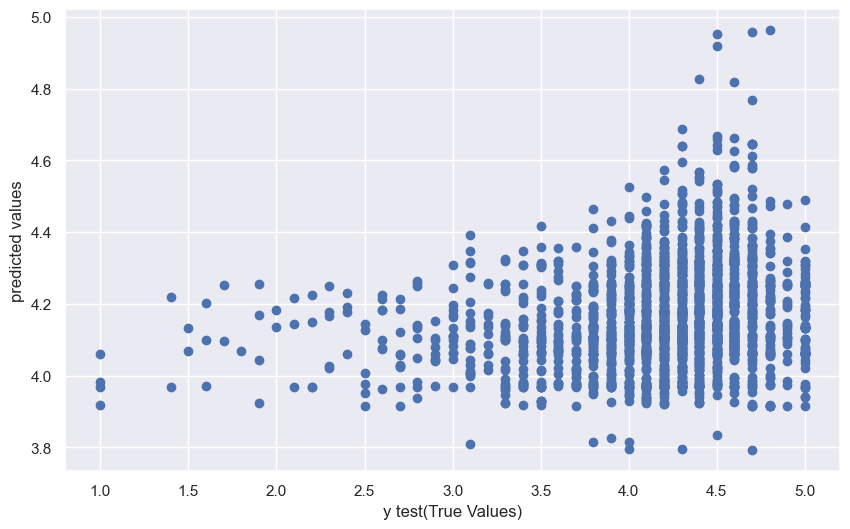

In [72]:
plt.scatter(y_test,predictions)
plt.xlabel('y test(True Values)')
plt.ylabel('predicted values')

In [73]:
from sklearn import metrics


In [74]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.3852458631167977
MSE  0.29442981580931815
RMSE  0.5426138735872114


In [75]:
metrics.explained_variance_score(y_test,predictions)

0.04397538355609387

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y) 

RandomForestRegressor(random_state=0)

In [78]:
predictions = regressor.predict(X_test)

Text(0, 0.5, 'Predicted values')

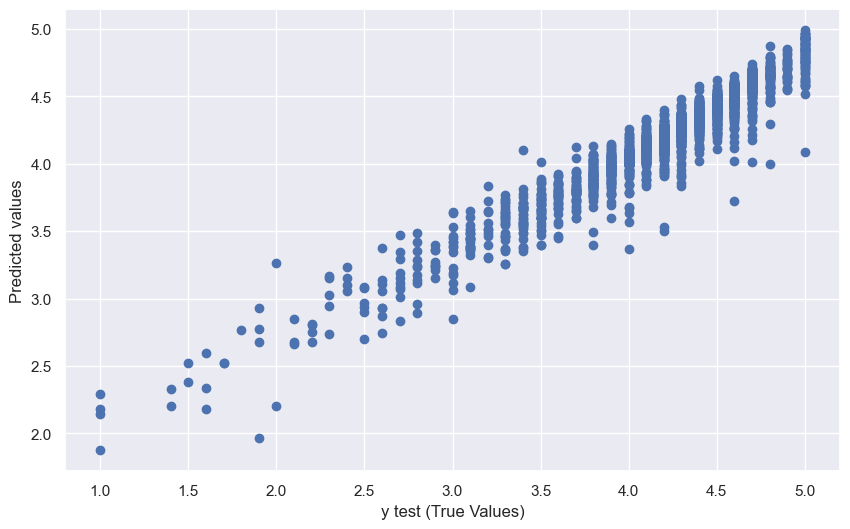

In [79]:
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [80]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.12859134935637784
MSE  0.038790250383408595
RMSE  0.1969524063915153


In [81]:
metrics.explained_variance_score(y_test,predictions)

0.8739881680491383

In [82]:
from sklearn.linear_model import Lasso

In [83]:
clf = Lasso()
clf.fit(X,y)

Lasso()

In [84]:
predictions = clf.predict(X_test)

Text(0, 0.5, 'Predicted values')

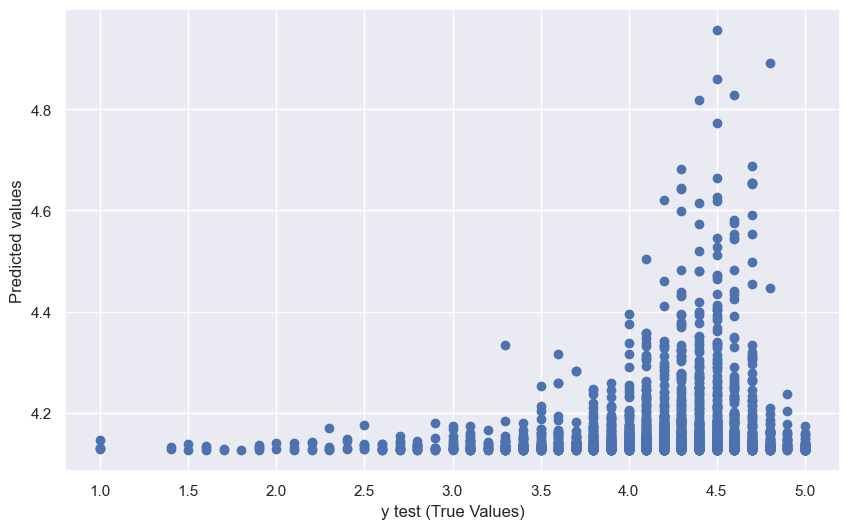

In [85]:
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [86]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.3878821618107424
MSE  0.30155929135812093
RMSE  0.5491441444266896


In [87]:
metrics.explained_variance_score(y_test,predictions)

0.020540829019996876

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted values')

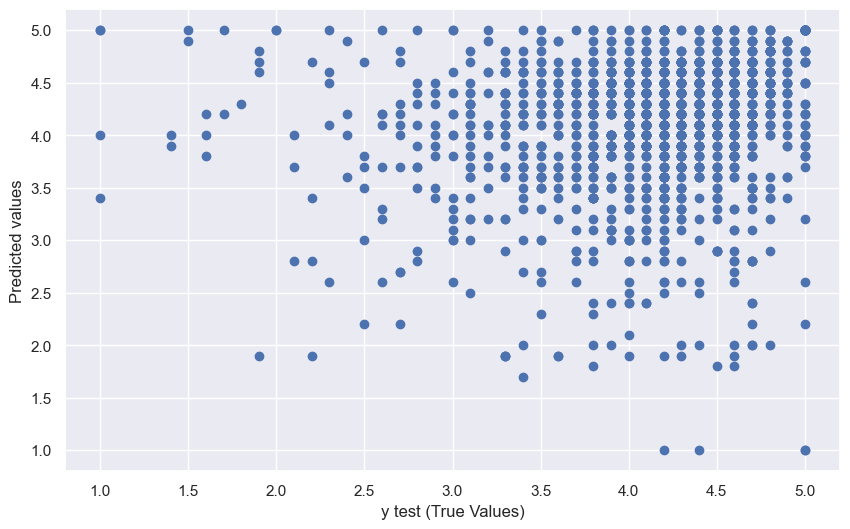

In [91]:
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [92]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.4498109640831758
MSE  0.5004914933837429
RMSE  0.7074542341266628


In [93]:
metrics.explained_variance_score(y_test,predictions)

-0.6259088999339033

In [94]:
from sklearn.svm import SVR

In [95]:
model1 = SVR()
model1.fit(X_train, y_train)

SVR()

In [96]:
predictions = model1.predict(X_test)

Text(0, 0.5, 'Predicted values')

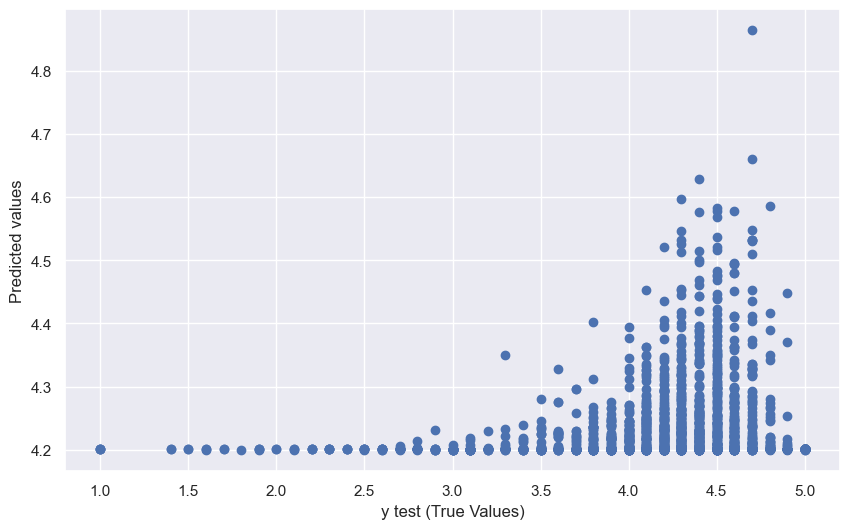

In [97]:
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')

In [98]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.3738056337467335
MSE  0.30216124038992853
RMSE  0.5496919504503668


In [99]:
metrics.explained_variance_score(y_test,predictions)

0.028232044357938246

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
model2 = GradientBoostingRegressor()

# Fit the model to the training data
model2.fit(X_train, y_train)


GradientBoostingRegressor()

Text(0, 0.5, 'Predicted values')

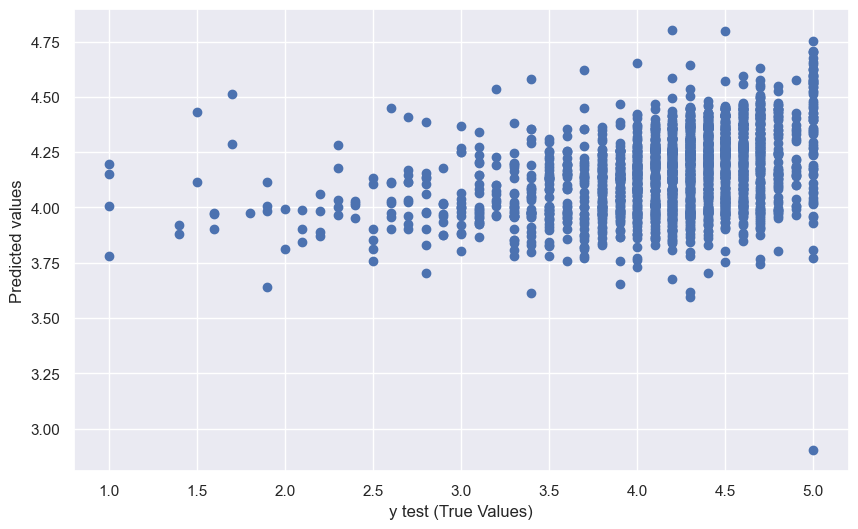

In [102]:
predictions = model2.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('y test (True Values)')
plt.ylabel('Predicted values')


In [103]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.3617043012458153
MSE  0.26837746679193436
RMSE  0.5180516063018571


In [104]:
metrics.explained_variance_score(y_test,predictions)

0.1286987313261374